<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Создание-модели-для-подбора-тарифов" data-toc-modified-id="Создание-модели-для-подбора-тарифов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Создание модели для подбора тарифов</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Обучающее-древо" data-toc-modified-id="Обучающее-древо-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Обучающее древо</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Экзамен" data-toc-modified-id="Экзамен-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Экзамен</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Обучающее-древо" data-toc-modified-id="Обучающее-древо-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Обучающее древо</a></span></li><li><span><a href="#Рандомный-лес" data-toc-modified-id="Рандомный-лес-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Рандомный лес</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение   клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».    
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф.

## Описание данных

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:  
**сalls** — количество звонков,  
**minutes** — суммарная длительность звонков в минутах,  
**messages** — количество sms-сообщений,  
**mb_used** — израсходованный интернет-трафик в Мб,  
**is_ultra** — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0). 

## Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV


In [2]:
try:
    df= pd.read_csv('users_behavior.csv')
except:
    df= pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [6]:
df.duplicated().sum()

0

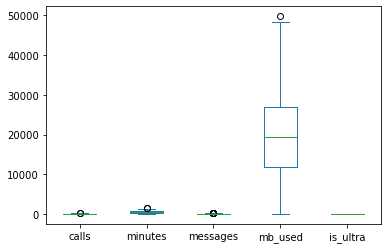

In [7]:
df_ultra = df.query('is_ultra == 1')
df_ultra.plot(kind='box');

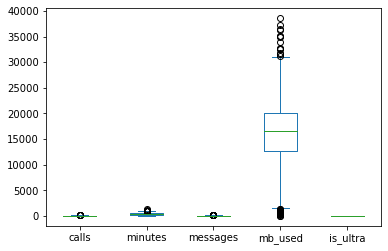

In [8]:
df_smart = df.query('is_ultra == 0')
df_smart.plot(kind='box');

Хотя нам и сказали, что предобработка не требуется, но у нас всё же имеются выбросы у смарт, удалим их для лучшего обучения, т.к. моделе будет проще находить типичных пользователей, чем редких

In [9]:
def remove_outliers(data):
    for column in data:
        q_1,q_3 = data[column].quantile([0.25,0.75])
        iqr = q_3 - q_1
        low = q_1 - (1.5 * iqr)   
        up = q_3 + (1.5 * iqr)
        data = data[(data[column] <= up) & (data[column] >= low)]
    return data

df_smart = remove_outliers(df_smart)
df_ultra = remove_outliers(df_ultra)

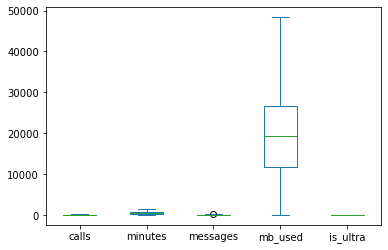

In [10]:
df_ultra.plot(kind='box');

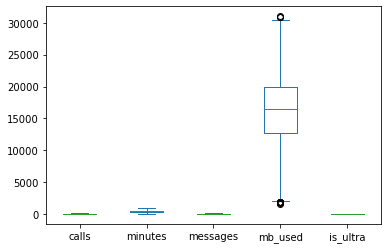

In [11]:
df_smart.plot(kind='box');

In [12]:
df = df_ultra.append(df_smart)

Переведем МБ в ГБ для удобства и чтобы интернет-трафик не казался наиболее важным параметром

In [13]:
df['mb_used'] = df['mb_used'] / 1024
df = df.rename(columns={'mb_used':'gb_used'})

Исследуем зависимости данных друг от друга

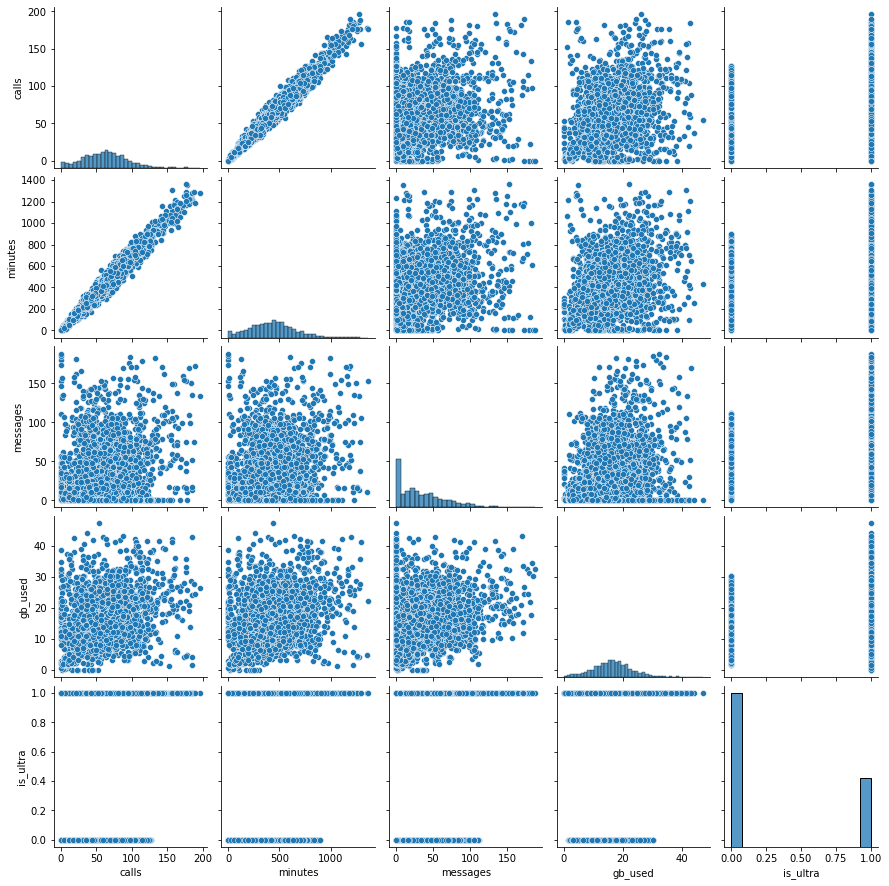

In [14]:
sns.pairplot(df);

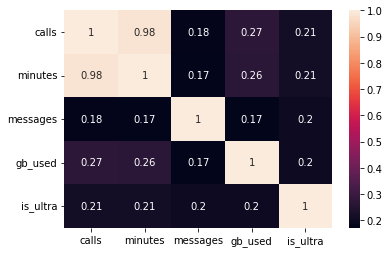

In [15]:
sns.heatmap(df.corr(),annot=True);

Видим очень сильную корреляцию между минутами и звонками, и, чтобы избежать мультиколлинеарности удалим один из этих столбцов

In [16]:
df.drop(['minutes'], axis=1, inplace=True)

### Вывод

Данные впорядке, можно приступать к обучению модели.

## Создание модели для подбора тарифов

### Разделение данных на выборки

In [17]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [18]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [19]:
print(features.shape)
target.shape

(3142, 3)


(3142,)

Разделим выборки к соотношении 3:1:1, где обучающая, валидационная и тестовая выборки разделены соответственно 

In [20]:
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.4, random_state=42)

In [21]:
valid_features, test_features, valid_target, test_target = train_test_split(test_features, test_target, test_size=0.5, random_state=42)

In [22]:
print(train_features.shape)
print(train_target.shape)
print(test_features.shape)
print(test_target.shape)
print(valid_features.shape)
valid_target.shape

(1885, 3)
(1885,)
(629, 3)
(629,)
(628, 3)


(628,)

### Обучение модели

Для будущей оценки адекватности модели нам потребуется модель-манекен. 

In [23]:
# Создадим манекен, с которым будем сравнивать нашу модель
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(train_features, train_target)
print(f'Accuracy фиктивной модели: {dummy.score(valid_features, valid_target)}')

Accuracy фиктивной модели: 0.6735668789808917


Выходит, что если просто предсказывать всем пользователям тариф смарт, то в 67% это будет верное предсказание. Возьмем это значение за нижний порог для нашей модели.

#### Логистическая регрессия

In [24]:
model_alt = LogisticRegression(random_state=42)
model_alt.fit(train_features, train_target)
print(f'Accuracy на обучающей выборке: {model_alt.score(train_features, train_target)}')
print(f'Accuracy на валидационной выборке:{model_alt.score(valid_features, valid_target)}')

Accuracy на обучающей выборке: 0.7511936339522547
Accuracy на валидационной выборке:0.7436305732484076


In [25]:
pred_model_alt = model_alt.predict(valid_features)
print(classification_report(valid_target, pred_model_alt))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       423
           1       0.89      0.24      0.38       205

    accuracy                           0.74       628
   macro avg       0.81      0.61      0.61       628
weighted avg       0.78      0.74      0.69       628



Логистическая регрессия предсказывает верно в 74% случаев, что не подходит нам

#### Обучающее древо

In [26]:
best_model_tree = None
best_result_tree = 0
for depth in range(1,11):
        model_tree = DecisionTreeClassifier( max_depth=depth, random_state=42)
        model_tree.fit(train_features, train_target)
        result = model_tree.score(valid_features, valid_target)
        if result > best_result_tree:
            best_result_tree = result
            best_model_tree = model_tree
print(f'Accuracy на обучающей выборке: {best_model_tree.score(train_features, train_target)}')
print(f'Accuracy на валидационной выборке:{best_result_tree}')

Accuracy на обучающей выборке: 0.8328912466843501
Accuracy на валидационной выборке:0.8073248407643312


In [27]:
pred_best_model_tree = best_model_tree.predict(valid_features)
print(classification_report(valid_target, pred_best_model_tree))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       423
           1       0.84      0.51      0.63       205

    accuracy                           0.81       628
   macro avg       0.82      0.73      0.75       628
weighted avg       0.81      0.81      0.79       628



Показатели уже лучше, но лучше одного древа может быть только лес деревьев

#### Случайный лес

In [28]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
best_sample = 0
for est in range(10,30,10):
    for depth in range(1,10):
        for sample in range(2,5):
            model = RandomForestClassifier(n_estimators=est, max_depth=depth, min_samples_leaf=sample, random_state=42)
            model.fit(train_features, train_target)
            result = model.score(valid_features, valid_target)
            if result > best_result:
                best_result = result
                best_model = model
                best_est = est
                best_depth = depth
                best_sample = sample
print(f'Accuracy на обучающей выборке: {best_model.score(train_features, train_target)}')
print(f'Accuracy на валидационной выборке: {best_result}')
print(f'Лучшее кол-во "оценщиков": {best_est}')
print(f'Лучшая глубина дерева: {best_depth}')
print(f'Минимальное количество выборок, необходимое для разделения внутреннего узла: {best_sample}')

Accuracy на обучающей выборке: 0.8530503978779841
Accuracy на валидационной выборке: 0.8264331210191083
Лучшее кол-во "оценщиков": 20
Лучшая глубина дерева: 9
Минимальное количество выборок, необходимое для разделения внутреннего узла: 3


In [29]:
pred_best_model = best_model.predict(valid_features)
print(classification_report(valid_target, pred_best_model))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       423
           1       0.89      0.53      0.67       205

    accuracy                           0.83       628
   macro avg       0.85      0.75      0.77       628
weighted avg       0.84      0.83      0.81       628



Судя по докладу наша модель правильно предсказала 81% тарифа смарт и 92% тарифа ультра(precision),  
при этом полнота предсказания: 97% всех тарифов смарт, но только 54% тарифов ультра(recall)

### Экзамен

#### Логистическая регрессия

In [30]:
print(f' Accuracy логистической регрессии: {model_alt.score(test_features, test_target)}')

 Accuracy логистической регрессии: 0.7488076311605724


Accuracy логистической регрессии: 0.7488076311605724

#### Обучающее древо

In [31]:
print(f' Accuracy обучающего дерева: {best_model_tree.score(test_features, test_target)}')

 Accuracy обучающего дерева: 0.8330683624801272


Accuracy обучающего дерева: 0.8330683624801272

#### Рандомный лес

In [32]:
print(f' Accuracy рандомного леса: {best_model.score(test_features, test_target)}')

 Accuracy рандомного леса: 0.8410174880763116


 Accuracy рандомного леса: 0.8410174880763116

## Вывод

Наилучшие показатели accuracy = 0.84 на тестовой выборке показала модель, обученная алгоритмом случайного леса, однако это немногим выше чем у обычного обучающего дерева, у которого точность = 0.82. Худший результат показала логистическая регрессия с точностью предсказаний 74%